# 1교시 

## 1. surprise의 데이터셋 로드 메소드를 모두 작성하세요

## 2. 텍스트에서 분석에 방해가 되는 불필요한 문자나 기호 등을 사전에 제거하는 작업을 (_____) 이라고 한다.

## 3. 문서와 문서 간의 유사도 비교는 일반적으로 (_____)을 사용한다.

## 4. VADER를 이용한 감성분석에서 감성 지수를 표현한 compound score 같은 0 ~ 1 의 값을 가지며, 이를 기반으로 긍정/부정 감성 여부를 결정하며, 일반적으로 지수가 0.1 이상이면 긍정, 미만이면 부정으로 판단한다

-> X

## 5. 토픽 모델링에 사용되는 LDA는 앞서 배운 차원 축소의 LDA와 동일한 성능을 가진 알고리즘이다.

-> X

## 6. 성공과 실패에 대한 텍스들을 두 개씩 가져왔다. 각 텍스트별 유사도를 알아보세요

In [11]:
text_list = ["the point is, you can neveer be ahead of others by doing the same as others", 

             "success and failure depend on the attitude of the person",

             "failure isn't fatal, but failure to change might be",             

             "only those who dare to fail greatly can ever achieve greatly"] 

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [13]:
tfidf_vect = TfidfVectorizer()
feature_tfidf_vect = tfidf_vect.fit_transform(text_list)

In [14]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(feature_tfidf_vect, feature_tfidf_vect)

array([[1.        , 0.23920225, 0.05050632, 0.0426476 ],
       [0.23920225, 1.        , 0.1348942 , 0.        ],
       [0.05050632, 0.1348942 , 1.        , 0.06012604],
       [0.0426476 , 0.        , 0.06012604, 1.        ]])

## 7. 감성 사전을 영어로 쓰세요

## 8. 파이썬의 대표적인 한글 형태소 패키지는 무엇인가요

## 9. 비지도 감성 분석을 위한 감성사전 중 하나로, 주로 소셜 미디어의 텍스트에 대한 감성 분석을 제공하기 위한 패키지는?

## 10. 최근접 이웃 협업 필터링은 대부분 ( _____ ) 기반 ( ______ ) 기반 으로 만들어진다.

## 11. 사람마다 평가를 주는 기준이 다릅니다. 이것을 반영하는 평점을 무엇이라고 하는가?

## 12. surprise를 사용하기 위해서 필요한 3종류의 데이터는?

In [ ]:
1. user_id (사용자 아이디)
2. item_id (아이템 아이디)
3. rating (평점)

## 13. text 의 감성 점수를 구해주세요 (VADER , polarity_scores 사용 )

In [26]:
text = 'I decided, very early on, just to accept life unconditionally.I never expected it to do anything special for me, yet I seemed to accomplish far more than I had ever hoped. Most of the time it just happened to me withoutmy ever seeking it.' 

from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_analyzer.polarity_scores(text)

{'neg': 0.0, 'neu': 0.776, 'pos': 0.224, 'compound': 0.8658}

## 14. 한글 형태소 분석모듈의 종류 5가지는?

# 2교시 : 642p ~ 
## Surprise를 이용한 개인화 영화 추천 시스템 구축 

## 시각화 : 648p 

# 3교시 

In [33]:
!pip install jupyter-dash

     --------------------------------------- 10.2/10.2 MB 38.4 MB/s eta 0:00:00


In [34]:
!pip install plotly

In [35]:
import pandas as pd
import numpy as np

In [37]:
mpg = pd.read_csv('mpg.csv')
mpg[:5]

,Unnamed: 0,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [39]:
mpg = mpg.iloc[:, 1:]

In [40]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


In [42]:
import seaborn as sns

<Axes: xlabel='displ', ylabel='cty'>

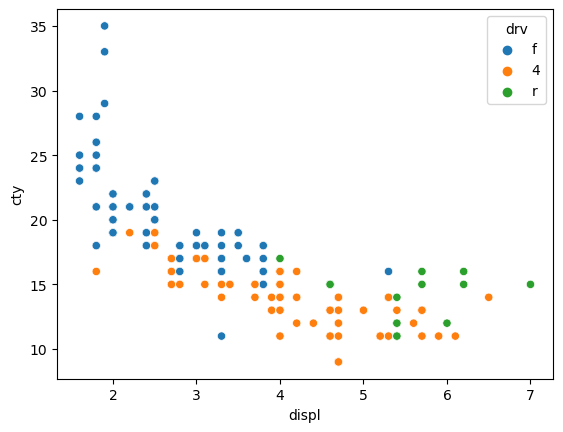

In [45]:
sns.scatterplot(data=mpg, x='displ', y='cty', hue= 'drv')

In [44]:
import matplotlib.pyplot as plt

In [46]:
import plotly.express as px

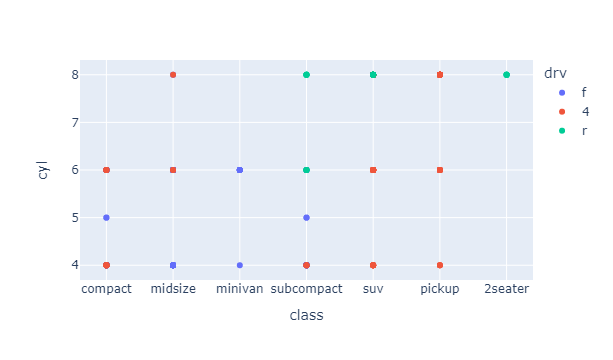

In [49]:
px.scatter(data_frame=mpg, x='class', y='cyl', color= 'drv')

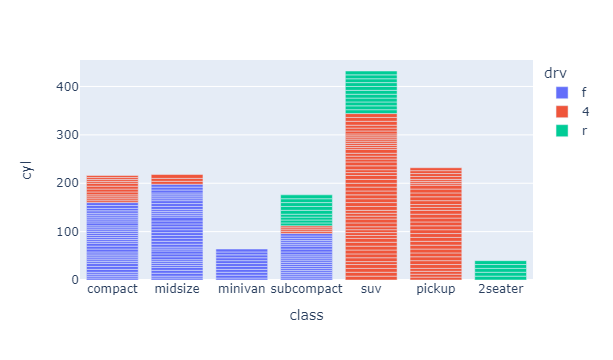

In [50]:
px.bar(data_frame=mpg, x='class', y='cyl', color= 'drv')

# 4교시

# 5교시 : 웹크롤링

In [53]:
import urllib.request

In [69]:
for i in range(1,6):
      url = 'https://www.pressian.com/pages/news-world-list?page='+str(i)
      print(url)

https://www.pressian.com/pages/news-world-list?page=1
https://www.pressian.com/pages/news-world-list?page=2
https://www.pressian.com/pages/news-world-list?page=3
https://www.pressian.com/pages/news-world-list?page=4
https://www.pressian.com/pages/news-world-list?page=5


In [58]:
url = 'https://www.pressian.com/pages/news-world-list?page=1'
html = urllib.request.urlopen(url).read()
html.decode(encoding='utf-8')

'<!doctype html>\n<html lang="ko">\n<head>\n    \n    \n    <meta charset="utf-8">\n    <!--meta name="viewport" content="width=1900, initial-scale=0.5, minimum-scale=0.1, maximum-scale=3, user-scalable=yes, target-densitydpi=medium-dpi"-->\n    <!--meta name="viewport" content="width=1700, initial-scale=1, minimum-scale=0.1, maximum-scale=3, user-scalable=yes, target-densitydpi=medium-dpi"-->\n    <meta name="csrf-token" content="hEZxUeqy8s3IYwJD4B92Vg6LbRD8jWoPGSmdK3O8"> <!-- FIXME: CSRF Token -->\n    <link rel="canonical" href="https://www.pressian.com/pages/news-world-list">\n                <meta name="Subject" content="관점이 있는 뉴스 - 프레시안" />\n        <meta name="Copyright" content="관점이 있는 뉴스 - 프레시안" />\n        <meta name="Keyword" content="관점이 있는 뉴스 - 프레시안" />\n        <meta name="Title" content="관점이 있는 뉴스 - 프레시안" />\n        <meta name="Description" content="관점이 있는 뉴스 - 프레시안" />\n        <meta name="naver-site-verification" content="829a32bc2eccf0cf21b7fbfdd06df931017addc4"/>\n 

In [59]:
from bs4 import BeautifulSoup

In [72]:
soup = BeautifulSoup(html, 'html.parser')
soup

<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<!--meta name="viewport" content="width=1900, initial-scale=0.5, minimum-scale=0.1, maximum-scale=3, user-scalable=yes, target-densitydpi=medium-dpi"-->
<!--meta name="viewport" content="width=1700, initial-scale=1, minimum-scale=0.1, maximum-scale=3, user-scalable=yes, target-densitydpi=medium-dpi"-->
<meta content="KtjHPFzYppb5Ih6795aXR0Q50s2RLaGCIVRPMO36" name="csrf-token"/> <!-- FIXME: CSRF Token -->
<link href="https://www.pressian.com/pages/news-world-list" rel="canonical"/>
<meta content="관점이 있는 뉴스 - 프레시안" name="Subject">
<meta content="관점이 있는 뉴스 - 프레시안" name="Copyright">
<meta content="관점이 있는 뉴스 - 프레시안" name="Keyword"/>
<meta content="관점이 있는 뉴스 - 프레시안" name="Title"/>
<meta content="관점이 있는 뉴스 - 프레시안" name="Description"/>
<meta content="829a32bc2eccf0cf21b7fbfdd06df931017addc4" name="naver-site-verification"/>
<meta content="/images/site/common/h_logo.png" property="og:image"/>
<title>관점이 있는 뉴스 - 프레시안</title>
<link 

In [61]:
title = soup.find_all(class_ = 'title')
title

[<p class="title"><a href="/">홈</a></p>,
 <p class="title"><a href="/pages/opinion">오피니언</a></p>,
 <p class="title"><a href="/pages/news-politics">정치</a></p>,
 <p class="title"><a href="/pages/news-economy">경제</a></p>,
 <p class="title"><a href="/pages/news-society">사회</a></p>,
 <p class="title"><a href="/pages/news-world">세계</a></p>,
 <p class="title"><a href="/pages/news-culture">문화</a></p>,
 <p class="title"><a href="/pages/books">Books</a></p>,
 <p class="title"><a href="/pages/nation">전국</a></p>,
 <p class="title"><a href="/pages/with">스페셜</a></p>,
 <p class="title"><a href="/psForums">협동조합</a></p>,
 <p class="title"><a href="/pages/articles/2023051209180646558">2023년의 한국과 동북아는 독립운동가를 기념할 수 있나</a></p>,
 <p class="title"><a href="/pages/articles/2023051117422597725">이스라엘, 가자지구 3일째 공습, 대체 왜 이러나?</a></p>,
 <p class="title"><a href="/pages/articles/2023051016301277418">성폭력 민사 패소한 트럼프, '차원이 다른 타격' 받을까</a></p>,
 <p class="title"><a href="/pages/articles/2023050917580611561">푸틴, 우크라전 "전쟁

In [65]:
titles = soup.find_all(class_ = 'body')
titles

[<p class="body"><a href="/pages/articles/2023051209180646558">중국 국민당 육군군관학교(일명 황포군관학교)
 
 코로나 팬데믹의 맹위도 어느 정도 잡힌 것 같다. 팬데믹으로 중국지역 한국독립운동 사적지 답사단의 활동이 중지된 지도 3년이 넘었다. 또한 동북아의 국제정세로 인해 한중관계 역시 코로나 팬데믹 이전 시기와는 사뭇 다른 분위기이다. 1992년 8월 한중수교 이후 한국과 중국은 경제적 파트너를 넘어 동북아 평화의 </a></p>,
 <p class="body"><a href="/pages/articles/2023051117422597725">팔레스타인 가자지구에 대한 이스라엘의 공습이 사흘째 이어지며 20명이 넘는 팔레스타인인이 사망했다. 가자지구 쪽에서도 500발이 넘는 로켓을 발사하며 양쪽의 충돌이 격화되고 있다. 
 
 이번 충돌로 사법 개편 관련 국내 반발에 부딪힌 베냐민 네타냐후 이스라엘 총리가 지지층 결집 효과를 누리는 동시에 팔레스타인에 대한 강경 대응을 주문해 온 연정 내 극우도 달</a></p>,
 <p class="body"><a href="/pages/articles/2023051016301277418">도널드 트럼프 미국 전 대통령이 27년 전 저지른 성폭력 관련 민사 소송에서 패소해 피해 여성에게 500만 달러(약 66억 원)를 배상하게 됐다. 차기 대선 출마를 선언한 트럼프 전 대통령은 지난 3월 미국 전·현직 대통령 중 처음으로 형사 기소된 뒤에도 굳건한 지지율을 유지했지만 사안의 성격상 이번 평결의 영향력은 차원이 다를 수 있다는 관측이 나온다.
 </a></p>,
 <p class="body"><a href="/pages/articles/2023050917580611561">블라디미르 푸틴 러시아 대통령이 2차 세계대전 당시 러시아가 독일에 승리한 것을 기념하는 전승절 행사에서 9일(현지시각) 우크라이나 침공을 "전쟁"으로 규정했다.
 
 &lt;로이터&gt; 통신, 영국 

In [67]:
len(titles)

10

In [66]:
titles[5].text

'지난 6일(현지시각) 8명의 희생자를 낳은 미국 텍사스주 댈러스 교외 쇼핑몰 총격범이 백인우월주의에 경도된 것으로 보이는 정황이 드러나 혐오 범죄 가능성이 떠오르는 가운데 7일 텍사스 남부 국경 도시 이민자 보호소 근처에 차량이 돌진해 8명이 목숨을 잃었다.\n\n<뉴욕타임스>(NYT)에 따르면 7일 텍사스 공공안전국은 전날 오후 3시30분께 댈러스'

In [70]:
for i in range(1,6):
      url = 'https://www.pressian.com/pages/news-world-list?page='+str(i)
      html = urllib.request.urlopen(url).read()
      html.decode(encoding='utf-8')
      
      soup = BeautifulSoup(html, 'html.parser')
      titles = soup.find_all(class_ = 'body')

      for title in titles:
            print(title.text)

중국 국민당 육군군관학교(일명 황포군관학교)

코로나 팬데믹의 맹위도 어느 정도 잡힌 것 같다. 팬데믹으로 중국지역 한국독립운동 사적지 답사단의 활동이 중지된 지도 3년이 넘었다. 또한 동북아의 국제정세로 인해 한중관계 역시 코로나 팬데믹 이전 시기와는 사뭇 다른 분위기이다. 1992년 8월 한중수교 이후 한국과 중국은 경제적 파트너를 넘어 동북아 평화의 
팔레스타인 가자지구에 대한 이스라엘의 공습이 사흘째 이어지며 20명이 넘는 팔레스타인인이 사망했다. 가자지구 쪽에서도 500발이 넘는 로켓을 발사하며 양쪽의 충돌이 격화되고 있다. 

이번 충돌로 사법 개편 관련 국내 반발에 부딪힌 베냐민 네타냐후 이스라엘 총리가 지지층 결집 효과를 누리는 동시에 팔레스타인에 대한 강경 대응을 주문해 온 연정 내 극우도 달
도널드 트럼프 미국 전 대통령이 27년 전 저지른 성폭력 관련 민사 소송에서 패소해 피해 여성에게 500만 달러(약 66억 원)를 배상하게 됐다. 차기 대선 출마를 선언한 트럼프 전 대통령은 지난 3월 미국 전·현직 대통령 중 처음으로 형사 기소된 뒤에도 굳건한 지지율을 유지했지만 사안의 성격상 이번 평결의 영향력은 차원이 다를 수 있다는 관측이 나온다.

블라디미르 푸틴 러시아 대통령이 2차 세계대전 당시 러시아가 독일에 승리한 것을 기념하는 전승절 행사에서 9일(현지시각) 우크라이나 침공을 "전쟁"으로 규정했다.

<로이터> 통신, 영국 BBC 방송 등을 종합하면 이날 모스크바 붉은 광장에서 열린 78주년 전승절 기념행사에서 연설에 나선 푸틴 대통령은 "오늘날 문명은 다시금 결정적 전환점을 맞았
러시아가 주말 우크라이나 남부 자포리자 원전 지역 주민들을 대피시킨 데 이어 수천 명에 이르는 원전 직원들까지 철수시키려 한다는 주장이 나오면서 핵물질 사고에 대한 위기감이 고조되고 있다.

<워싱턴포스트>(WP)는 8일(현지시각) 우크라이나 국영 원전기업 에네르고아톰의 페트로 코틴 대표가 러시아 당국이 3100명에 이르는 자포리자 원전 직원 대
지난 6일(현

In [73]:
li = []
for i in range(1,6):
      url = 'https://www.pressian.com/pages/news-world-list?page='+str(i)
      html = urllib.request.urlopen(url).read()
      html.decode(encoding='utf-8')
      
      soup = BeautifulSoup(html, 'html.parser')
      titles = soup.find_all(class_ = 'body')

      for title in titles:
            li.append(title.text)
            
df = pd.DataFrame(li)
df

,0
0,중국 국민당 육군군관학교(일명 황포군관학교)\n\n코로나 팬데믹의 맹위도 어느 정도...
1,팔레스타인 가자지구에 대한 이스라엘의 공습이 사흘째 이어지며 20명이 넘는 팔레스타...
2,도널드 트럼프 미국 전 대통령이 27년 전 저지른 성폭력 관련 민사 소송에서 패소해...
3,블라디미르 푸틴 러시아 대통령이 2차 세계대전 당시 러시아가 독일에 승리한 것을 기...
4,러시아가 주말 우크라이나 남부 자포리자 원전 지역 주민들을 대피시킨 데 이어 수천 ...
5,지난 6일(현지시각) 8명의 희생자를 낳은 미국 텍사스주 댈러스 교외 쇼핑몰 총격범...
6,한일 양국 정상이 두 달 만에 다시 한국에서 만나 회담을 가졌지만 한일 관계에 변화...
7,바샤르 알아사드 정권의 인권 탄압으로 아랍연맹(AL)에서 퇴출됐던 시리아가 12년 ...
8,찰스3세 영국 국왕이 6일(현지시간) 대관식을 갖고 '그레이트브리튼과 북아일랜드 연...
9,"지난 4월 19일부터 5월 1일까지 미국, 캐나다, 스웨덴에서 사는 한국 출신 60..."


In [77]:
li1 = []
li2 = []
for i in range(1,6):
      url = 'https://www.pressian.com/pages/news-world-list?page='+str(i)
      html = urllib.request.urlopen(url).read()
      html.decode(encoding='utf-8')
      
      soup = BeautifulSoup(html, 'html.parser')
      titles = soup.find_all(class_ = 'body')

      for title in titles: 
            li1.append(title.text)
       

      sub_titles = soup.find_all(class_ = 'sub_title')

      for sub_title in sub_titles:
            li2.append(sub_title.text)
      
      
df = pd.DataFrame({'소제목' : li2 , "첫줄" : li1})
df

,소제목,첫줄
0,"[원광대 '한중관계 브리핑'] 중국 광저우 묘지에 안장되어 있는 독립운동가, 김근제...",중국 국민당 육군군관학교(일명 황포군관학교)\n\n코로나 팬데믹의 맹위도 어느 정도...
1,팔레스타인 27명 사망에 무장단체 인사 추가 살해로 휴전 멀어져,팔레스타인 가자지구에 대한 이스라엘의 공습이 사흘째 이어지며 20명이 넘는 팔레스타...
2,"뉴욕 배심원단, 27년전 성폭력 가해에 500만 달러 배상 평결",도널드 트럼프 미국 전 대통령이 27년 전 저지른 성폭력 관련 민사 소송에서 패소해...
3,기념 연설서 이례적 발언…전쟁 원인 '오만한 서방'에 돌려,블라디미르 푸틴 러시아 대통령이 2차 세계대전 당시 러시아가 독일에 승리한 것을 기...
4,"러, 주말 인근 주민 1600명 대피시켜…'원전 인근 격전지 될라' 커지는 우려",러시아가 주말 우크라이나 남부 자포리자 원전 지역 주민들을 대피시킨 데 이어 수천 ...
5,6일 쇼핑몰 총격범 백인우월주의 경도 정황…7일엔 국경 도시 차량 돌진으로 이민자 ...,지난 6일(현지시각) 8명의 희생자를 낳은 미국 텍사스주 댈러스 교외 쇼핑몰 총격범...
6,"일본 포털 사이트 조사 결과 약 70% ""변하지 않을 것""",한일 양국 정상이 두 달 만에 다시 한국에서 만나 회담을 가졌지만 한일 관계에 변화...
7,"인근국 난민 부담 더해 사우디·이란 관계 정상화가 발판…미 ""시리아 재가입 자격 없...",바샤르 알아사드 정권의 인권 탄압으로 아랍연맹(AL)에서 퇴출됐던 시리아가 12년 ...
8,"'최장기간 왕세자' 꼬리표 떼고 즉위…해리는 참석, 마클은 불참",찰스3세 영국 국왕이 6일(현지시간) 대관식을 갖고 '그레이트브리튼과 북아일랜드 연...
9,입양인 고국 방문 등 돕는 美 뉴저지 비영리기관 세종문화교육원,"지난 4월 19일부터 5월 1일까지 미국, 캐나다, 스웨덴에서 사는 한국 출신 60..."


# 6교시

In [ ]:
https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%ED%8A%B8%EC%99%80%EC%9D%B4%EC%8A%A4&p=1

In [80]:
li = []
for i in range(1,6):
      url = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%ED%8A%B8%EC%99%80%EC%9D%B4%EC%8A%A4&p=1'
      html = urllib.request.urlopen(url).read()
      html.decode(encoding='utf-8')
      
      soup = BeautifulSoup(html, 'html.parser')
      titles = soup.find_all(class_ = 'body')

      for title in titles: 
            li1.append(title.text)
       
li

[]

In [83]:
titles

[]

In [85]:
html

b'<script type="text/javascript">\nlocation.replace( "https://captcha.search.daum.net/show?redirect=http%3A%2F%2Fsearch.daum.net%2Fsearch%3Fw%3Dnews%26DA%3DPGD%26enc%3Dutf8%26cluster%3Dy%26cluster_page%3D1%26q%3D%25ED%258A%25B8%25EC%2599%2580%25EC%259D%25B4%25EC%258A%25A4%26p%3D1" );\n</script>\n'

In [ ]:
## header
## user agent
### -> 주소 request 막힌 거 뚫어서 가져오기

## request(구버전) -> requests(새버전)

In [87]:
import requests

url = 'https://search.daum.net/search?w=news&DA=PGD&enc=utf8&cluster=y&cluster_page=1&q=%ED%8A%B8%EC%99%80%EC%9D%B4%EC%8A%A4&p=1'

headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36"}

# html = urllib.request.urlopen(url).read()
# html.decode(encoding='utf-8')

html = requests.get(url, headers = headers)
      
      
soup = BeautifulSoup(html.text, 'html.parser')
titles = soup.find_all(class_ = 'tit_main fn_tit_u')


In [88]:
html

<Response [200]>

In [89]:
titles

[<a class="tit_main fn_tit_u" href="https://v.daum.net/v/20230512070444431?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26rrnbLuAuUPp1fBqp&amp;pg=1&amp;r=1&amp;p=4&amp;rc=10&amp;e1=16fEGriEE1VVeRH5aC&amp;e3=0&amp;ext=dsid=26rrnbLuAuUPp1fBqp", event, {"cpid": {"value": "16fEGriEE1VVeRH5aC"}});' target="_blank"><b>TWICE</b>(<b>트와이스</b>) ‘오사카로 월드투어 떠나요~’[포토엔HD]</a>,
 <a class="tit_main fn_tit_u" href="https://v.daum.net/v/20230512114046779?f=o" onclick='smartLog(this, "dc=NNS&amp;d=265_bnSXVWlmzq5mwJ&amp;pg=1&amp;r=2&amp;p=4&amp;rc=10&amp;e1=16Tr4PLF2A9hpwE3H3&amp;e3=0&amp;ext=dsid=265_bnSXVWlmzq5mwJ", event, {"cpid": {"value": "16Tr4PLF2A9hpwE3H3"}});' target="_blank"><b>트와이스</b> 채영, '멋스럽게' [사진]</a>,
 <a class="tit_main fn_tit_u" href="https://v.daum.net/v/20230512114018760?f=o" onclick='smartLog(this, "dc=NNS&amp;d=26wMqEMi6Z4oLOT-5j&amp;pg=1&amp;r=3&amp;p=4&amp;rc=10&amp;e1=16Tr4PLF2A9hpwE3H3&amp;e3=0&amp;ext=dsid=26wMqEMi6Z4oLOT-5j", event, {"cpid": {"value": "16Tr4PLF2A9hpwE3H3"}});' t